In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas import Series,DataFrame

In [3]:
%matplotlib inline

In [17]:
car_df=pd.read_csv('C:\\Users\\k.divakar.reddy\\Downloads\\car.csv',header=None,sep=",")

1. Title: Car Evaluation Database

2. Sources:
   (a) Creator: Marko Bohanec
   (b) Donors: Marko Bohanec   (marko.bohanec@ijs.si)
               Blaz Zupan      (blaz.zupan@ijs.si)
   (c) Date: June, 1997

3. Past Usage:

   The hierarchical decision model, from which this dataset is
   derived, was first presented in 

   M. Bohanec and V. Rajkovic: Knowledge acquisition and explanation for
   multi-attribute decision making. In 8th Intl Workshop on Expert
   Systems and their Applications, Avignon, France. pages 59-78, 1988.

   Within machine-learning, this dataset was used for the evaluation
   of HINT (Hierarchy INduction Tool), which was proved to be able to
   completely reconstruct the original hierarchical model. This,
   together with a comparison with C4.5, is presented in

   B. Zupan, M. Bohanec, I. Bratko, J. Demsar: Machine learning by
   function decomposition. ICML-97, Nashville, TN. 1997 (to appear)

4. Relevant Information Paragraph:

   Car Evaluation Database was derived from a simple hierarchical
   decision model originally developed for the demonstration of DEX
   (M. Bohanec, V. Rajkovic: Expert system for decision
   making. Sistemica 1(1), pp. 145-157, 1990.). The model evaluates
   cars according to the following concept structure:

   CAR                      car acceptability
   . PRICE                  overall price
   . . buying               buying price
   . . maint                price of the maintenance
   . TECH                   technical characteristics
   . . COMFORT              comfort
   . . . doors              number of doors
   . . . persons            capacity in terms of persons to carry
   . . . lug_boot           the size of luggage boot
   . . safety               estimated safety of the car

   Input attributes are printed in lowercase. Besides the target
   concept (CAR), the model includes three intermediate concepts:
   PRICE, TECH, COMFORT. Every concept is in the original model
   related to its lower level descendants by a set of examples (for
   these examples sets see http://www-ai.ijs.si/BlazZupan/car.html).

   The Car Evaluation Database contains examples with the structural
   information removed, i.e., directly relates CAR to the six input
   attributes: buying, maint, doors, persons, lug_boot, safety.

   Because of known underlying concept structure, this database may be
   particularly useful for testing constructive induction and
   structure discovery methods.

5. Number of Instances: 1728
   (instances completely cover the attribute space)

6. Number of Attributes: 6

7. Attribute Values:

   buying       v-high, high, med, low
   maint        v-high, high, med, low
   doors        2, 3, 4, 5-more
   persons      2, 4, more
   lug_boot     small, med, big
   safety       low, med, high

8. Missing Attribute Values: none

9. Class Distribution (number of instances per class)

   class      N          N[%]
   -----------------------------
   unacc     1210     (70.023 %) 
   acc        384     (22.222 %) 
   good        69     ( 3.993 %) 
   v-good      65     ( 3.762 %) 


In [20]:
car_df.head()

,0,1,2,3,4,5,6
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


 CAR                      car acceptability
   . PRICE                  overall price
   . . buying               buying price
   . . maint                price of the maintenance
   . TECH                   technical characteristics
   . . COMFORT              comfort
   . . . doors              number of doors
   . . . persons            capacity in terms of persons to carry
   . . . lug_boot           the size of luggage boot
   . . safety               estimated safety of the car

In [21]:
car_df.columns=['buying','maint','doors','persons','lug_boot','safety','classes']

In [22]:
car_df.head()

,buying,maint,doors,persons,lug_boot,safety,classes
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [23]:
car_df.tail()

,buying,maint,doors,persons,lug_boot,safety,classes
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good
1727,low,low,5more,more,big,high,vgood


In [36]:
import seaborn as sns

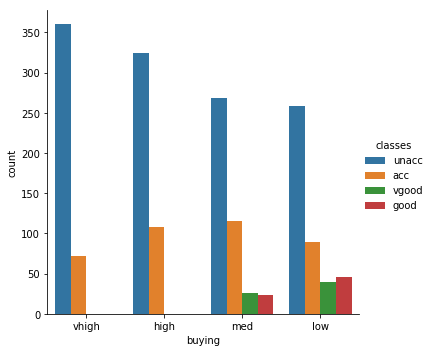

In [54]:
sns.catplot('buying',data=car_df,hue='classes',kind='count')

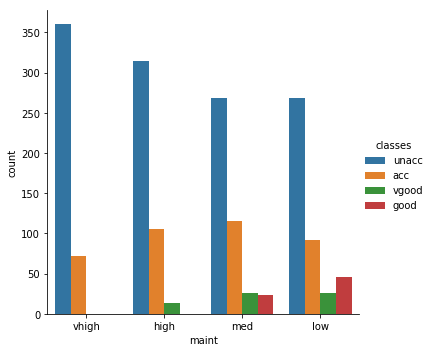

In [55]:
sns.catplot('maint',data=car_df,hue='classes',kind='count')

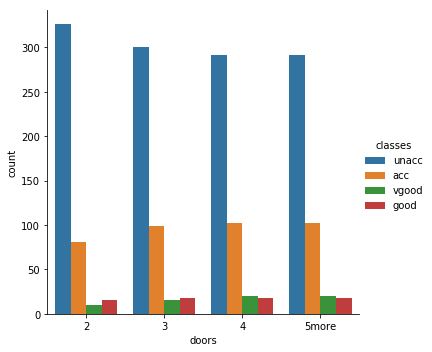

In [66]:
sns.catplot('doors',data=car_df,hue='classes',kind='count')

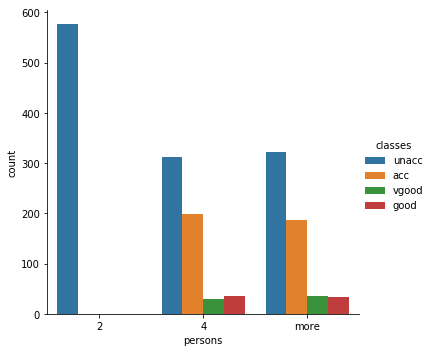

In [59]:
sns.catplot('persons',data=car_df,hue='classes',kind='count')

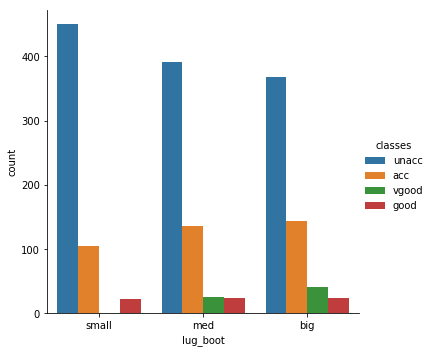

In [61]:
sns.catplot('lug_boot',data=car_df,hue='classes',kind='count')

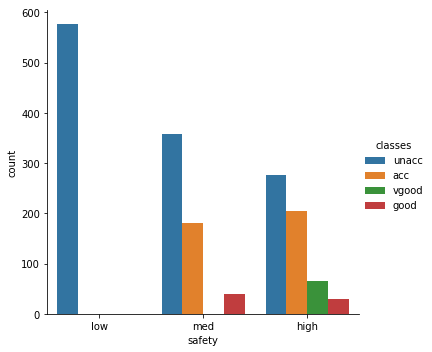

In [64]:
sns.catplot('safety',data=car_df,hue='classes',kind='count')

In [77]:
buying_dum=pd.get_dummies(car_df.buying)

In [79]:
maintain_dum=pd.get_dummies(car_df.maint)

In [80]:
doors_dum=pd.get_dummies(car_df.doors)

In [82]:
persons_dum=pd.get_dummies(car_df.persons)

In [83]:
lug_boot_dum=pd.get_dummies(car_df.lug_boot)

In [84]:
safety_dum=pd.get_dummies(car_df.safety)

In [88]:
car_df_dum=pd.concat([buying_dum,maintain_dum,persons_dum,lug_boot_dum,safety_dum],sort=False,axis=1)

In [106]:
car_df_dum.head()

,high,low,med,vhigh,high,low,med,vhigh,2,4,more,big,med,small,high,low,med
0,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,1,0
1,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,1
2,0,0,0,1,0,0,0,1,1,0,0,0,0,1,1,0,0
3,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,1,0
4,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,1


In [25]:
#X=car_df.drop(['classes','doors'],axis=1)

In [107]:
X=car_df_dum

In [108]:
X.shape

(1728, 17)

In [110]:
Y=car_df['classes']

In [111]:
Y.shape

(1728,)

In [112]:
import sklearn

In [113]:
from sklearn.linear_model import LogisticRegression

In [141]:
log=LogisticRegression(solver='saga',multi_class='auto')

In [142]:
log.fit(X,Y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='auto',
          n_jobs=None, penalty='l2', random_state=None, solver='saga',
          tol=0.0001, verbose=0, warm_start=False)

In [143]:
from sklearn.model_selection import train_test_split

In [144]:
X_train, X_test, Y_train, Y_test=train_test_split(X,Y)

In [145]:
log.fit(X_train,Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='auto',
          n_jobs=None, penalty='l2', random_state=None, solver='saga',
          tol=0.0001, verbose=0, warm_start=False)

In [146]:
y=log.predict(X_test)

In [147]:
from sklearn.metrics import accuracy_score

In [148]:
accuracy_score(Y_test,y)

0.8981481481481481